Failed to create TzCache, reason: Cannot read and write in TzCache folder: '/Users/kedarwaghmode/Library/Caches/py-yfinance'
TzCache will not be used.
Tip: You can direct cache to use a different location with 'set_tz_cache_location(mylocation)'
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ^GSPC: No timezone found, symbol may be delisted

^GSPC Kurtosis Analysis:
Actual Kurtosis: nan
Excess Kurtosis: nan


/Users/kedarwaghmode/miniconda3/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1160: RuntimeWarning: Mean of empty slice.
  mean = a.mean(axis, keepdims=True)
/Users/kedarwaghmode/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Users/kedarwaghmode/miniconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/kedarwaghmode/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/kedarwaghmode/miniconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


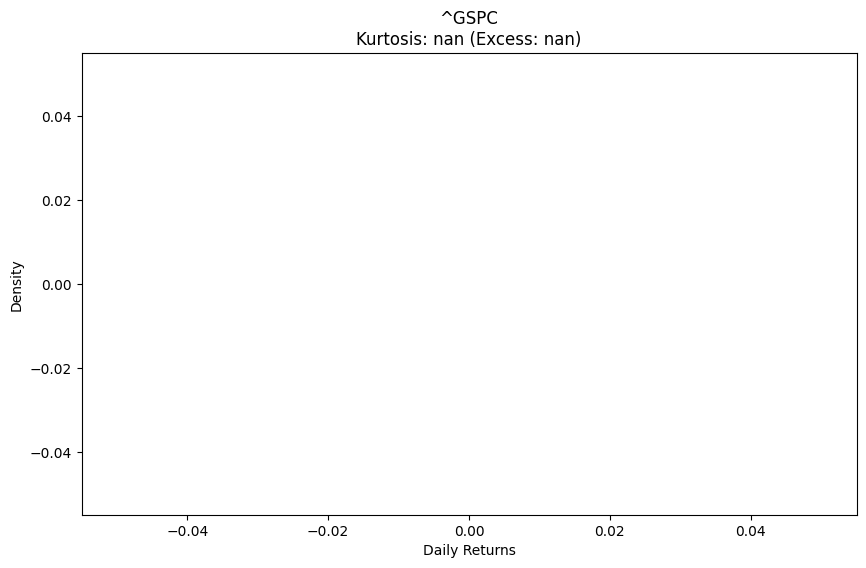

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BTC-USD: No timezone found, symbol may be delisted

BTC-USD Kurtosis Analysis:
Actual Kurtosis: nan
Excess Kurtosis: nan


/Users/kedarwaghmode/miniconda3/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1160: RuntimeWarning: Mean of empty slice.
  mean = a.mean(axis, keepdims=True)
/Users/kedarwaghmode/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Users/kedarwaghmode/miniconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/kedarwaghmode/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/kedarwaghmode/miniconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


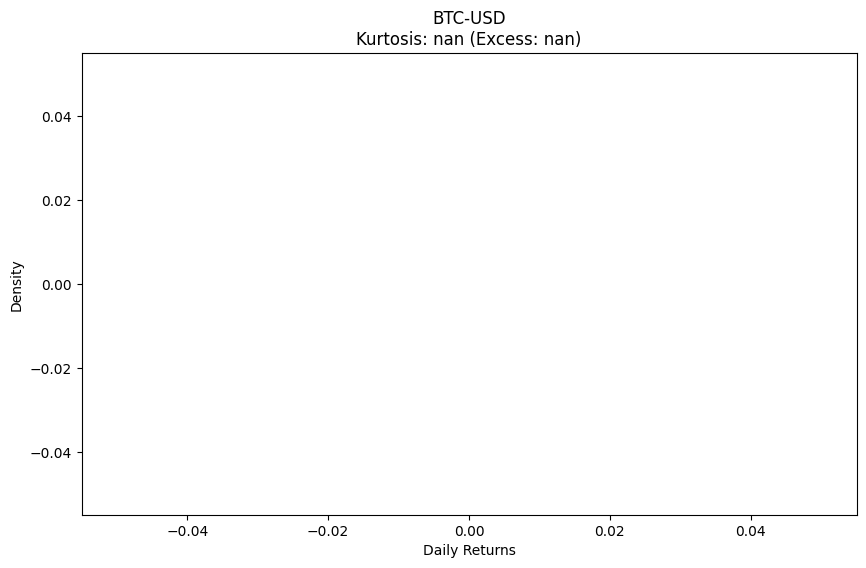

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- GC=F: No timezone found, symbol may be delisted

GC=F Kurtosis Analysis:
Actual Kurtosis: nan
Excess Kurtosis: nan


/Users/kedarwaghmode/miniconda3/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1160: RuntimeWarning: Mean of empty slice.
  mean = a.mean(axis, keepdims=True)
/Users/kedarwaghmode/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Users/kedarwaghmode/miniconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/kedarwaghmode/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/kedarwaghmode/miniconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


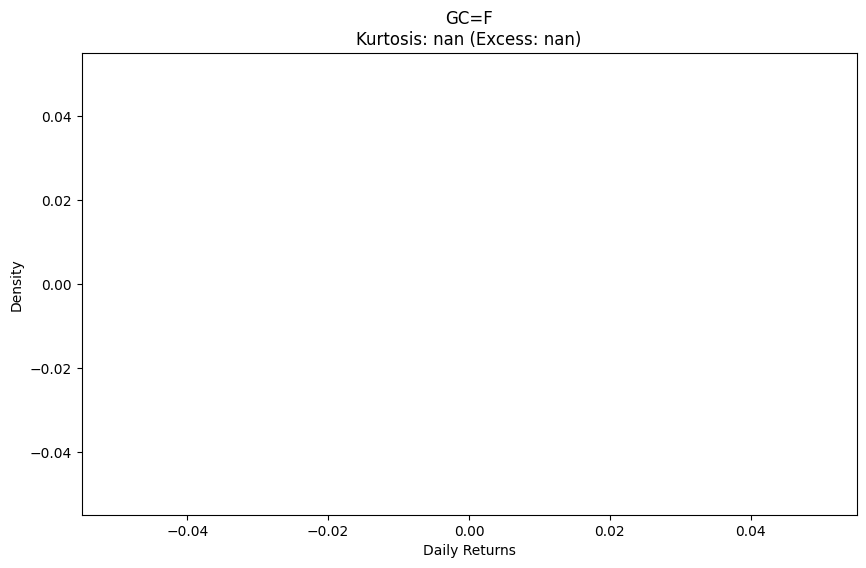

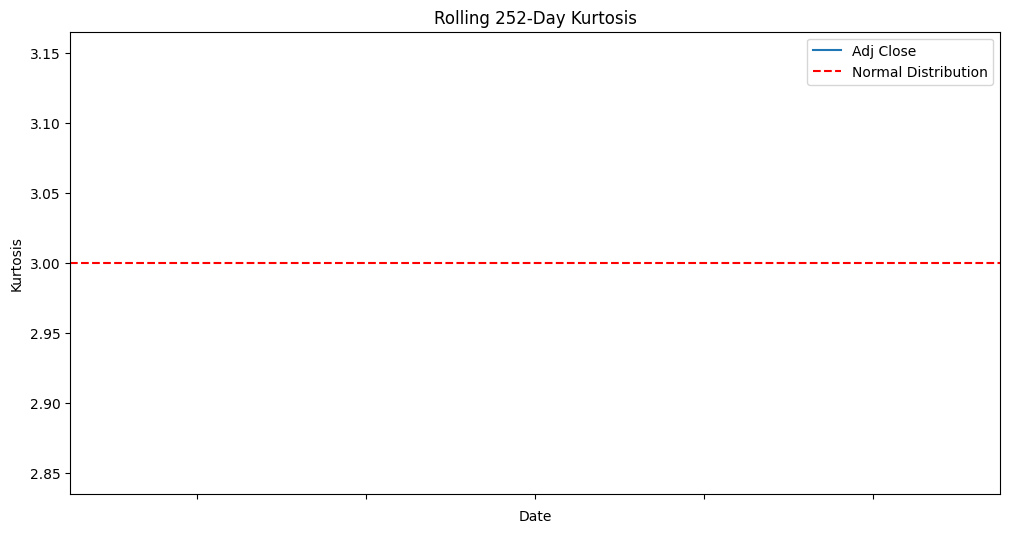

/Users/kedarwaghmode/miniconda3/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1160: RuntimeWarning: Mean of empty slice.
  mean = a.mean(axis, keepdims=True)
/Users/kedarwaghmode/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Users/kedarwaghmode/miniconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/kedarwaghmode/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/kedarwaghmode/miniconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges



S&P 500 During COVID Market Crash Kurtosis Analysis:
Actual Kurtosis: nan
Excess Kurtosis: nan


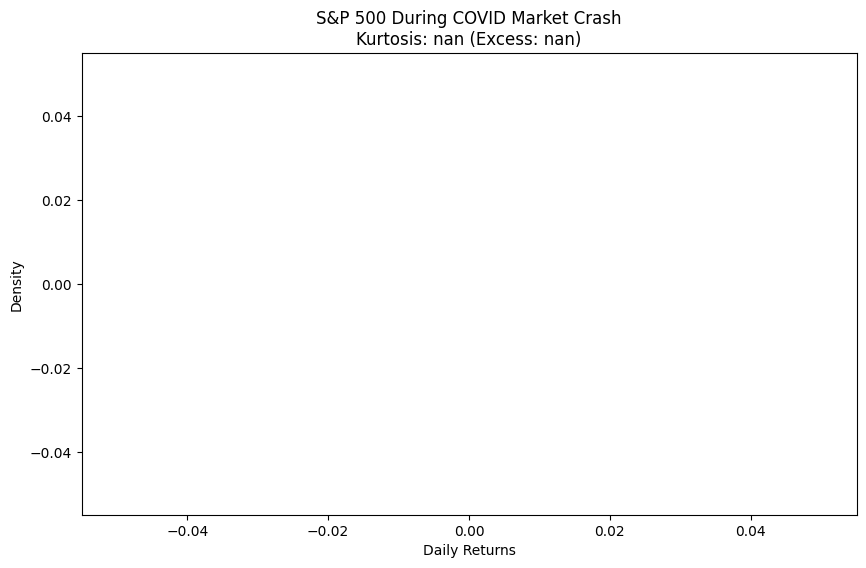

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import kurtosis

# 1. Download financial time series data
def download_data(ticker, start_date, end_date):
    """
    Download stock data using Yahoo Finance API
    """
    data = yf.download(ticker, start=start_date, end=end_date)
    return data['Adj Close']

# 2. Calculate daily returns
def calculate_returns(prices):
    """
    Calculate daily logarithmic returns
    """
    return np.log(prices / prices.shift(1)).dropna()

# 3. Analyze kurtosis
def analyze_kurtosis(returns, title):
    """
    Calculate and visualize kurtosis of returns
    """
    # Calculate kurtosis
    kurt = kurtosis(returns, fisher=False)  # Fisher=False to get actual kurtosis
    excess_kurt = kurtosis(returns, fisher=True)  # Fisher=True for excess kurtosis
    
    print(f"\n{title} Kurtosis Analysis:")
    print(f"Actual Kurtosis: {kurt:.4f}")
    print(f"Excess Kurtosis: {excess_kurt:.4f}")
    
    # Visualize
    plt.figure(figsize=(10, 6))
    plt.hist(returns, bins=50, density=True, alpha=0.6, color='g')
    
    # Plot normal distribution for comparison
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = np.exp(-(x - returns.mean())**2 / (2 * returns.std()**2)) / (returns.std() * np.sqrt(2 * np.pi))
    plt.plot(x, p, 'k', linewidth=2)
    
    plt.title(f"{title}\nKurtosis: {kurt:.2f} (Excess: {excess_kurt:.2f})")
    plt.xlabel('Daily Returns')
    plt.ylabel('Density')
    plt.show()
    
    return kurt, excess_kurt

# 4. Compare different assets
def compare_assets(assets, start_date, end_date):
    """
    Compare kurtosis across different assets
    """
    results = {}
    
    for asset in assets:
        prices = download_data(asset, start_date, end_date)
        returns = calculate_returns(prices)
        kurt, excess_kurt = analyze_kurtosis(returns, asset)
        results[asset] = {
            'kurtosis': kurt,
            'excess_kurtosis': excess_kurt,
            'returns': returns
        }
    
    return results

# 5. Rolling kurtosis analysis
def rolling_kurtosis(returns, window=252):
    """
    Calculate rolling kurtosis over time
    """
    rolling_kurt = returns.rolling(window).apply(lambda x: kurtosis(x, fisher=False))
    
    plt.figure(figsize=(12, 6))
    rolling_kurt.plot()
    plt.title(f'Rolling {window}-Day Kurtosis')
    plt.xlabel('Date')
    plt.ylabel('Kurtosis')
    plt.axhline(y=3, color='r', linestyle='--', label='Normal Distribution')
    plt.legend()
    plt.show()
    
    return rolling_kurt

# Main execution
if __name__ == "__main__":
    # Define parameters
    assets = ['^GSPC', 'BTC-USD', 'GC=F']  # S&P 500, Bitcoin, Gold
    start_date = '2018-01-01'
    end_date = '2023-01-01'
    
    # Compare assets
    results = compare_assets(assets, start_date, end_date)
    
    # Analyze rolling kurtosis for S&P 500
    sp500_returns = results['^GSPC']['returns']
    rolling_kurt = rolling_kurtosis(sp500_returns)
    
    # Extreme event analysis (COVID market crash)
    covid_period = sp500_returns['2020-01-01':'2020-06-30']
    analyze_kurtosis(covid_period, "S&P 500 During COVID Market Crash")

In [ ]:
"""
Assignment Tasks
1. Data Collection & Basic Analysis:

Run the code to download and analyze different assets

Which asset has the highest kurtosis? What does this imply about its return distribution?

2. Parameter Exploration:

Modify the time period (try including the 2008 financial crisis)

Change the rolling window size for kurtosis calculation. How does this affect the results?

3. Extended Analysis:

Add more assets to compare (tech stocks, commodities, currencies)

Implement a function to test for statistically significant differences in kurtosis

4. Visualization Enhancement:

Create a QQ-plot to visually compare the distribution against normal

Plot kurtosis over time alongside price movements to identify patterns

5. Advanced Modeling:

Simulate normal returns with the same mean/std as your data and compare kurtosis

Research and implement methods to deal with high kurtosis in financial modeling

Key Questions to Consider
1. How does kurtosis change during market crises compared to calm periods?
2. What are the implications of high kurtosis for risk management?
3. How might kurtosis affect your choice of statistical models?
4. Can you identify periods where kurtosis was a leading indicator of volatility?
"""